In [98]:
!pip install openpyxl xlrd
import numpy as np
import pandas as pd
import datetime as dt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


# Vasicek Model (Brigo-Mercurio 3.2.1(2006))

In [142]:
df_spread = pd.read_excel('./BAA10Y.xls', sheet_name='FRED Graph')
df_spread = df_spread.rename(columns={'observation_date':'date'}).fillna(method='ffill')
df_spread['date_desc'] = df_spread.sort_values(['date'], ascending=[False]).groupby(df_spread['date'].dt.strftime('%Y-%m')).cumcount() + 1
# df_spread = df_spread[df_spread['date_desc'] == 1]
# df_spread = df_spread[df_spread['date'].dt.day_name()=='Friday']
df_spread['lagged'] = df_spread['BAA10Y'].shift(1)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df_spread)
cols, rows = df_spread.shape
print(cols, rows)
n = cols - 1
d = 20/cols
c_baa = df_spread.columns.get_loc('BAA10Y')
c_lag = df_spread.columns.get_loc('lagged')

5219 4


In [143]:
sum_paced = df_spread.iloc[1:cols,c_baa].sum()
sum_lagged = df_spread.iloc[1:cols,c_lag].sum()
sum_lagged_squares = (df_spread.iloc[1:cols,c_lag]**2).sum()
sum_paced_lagged = (df_spread.iloc[1:cols,c_baa]*df_spread.iloc[1:cols,c_lag]).sum()
alpha_hat = (n * sum_paced_lagged - sum_paced * sum_lagged) / (n * sum_lagged_squares - sum_lagged ** 2)
beta_hat = (sum_paced - alpha_hat * sum_lagged) / (n * (1 - alpha_hat))
v_square_hat = 1/n * ((df_spread.iloc[1:cols,c_baa] - alpha_hat * df_spread.iloc[1:cols,c_lag] - beta_hat * (1 - alpha_hat)) ** 2).sum()
a = np.log(alpha_hat)/(-d)
b = beta_hat * a
sigma = np.sqrt(2 * a * v_square_hat/(1-alpha_hat**2))
kappa = a
theta = beta_hat
print(f'mean-reversion speed: {kappa:.4f}, long-term mean: {theta:.4f}, volatility: {sigma:.4f}')

mean-reversion speed: 0.2012, long-term mean: 2.2085, volatility: 0.4775


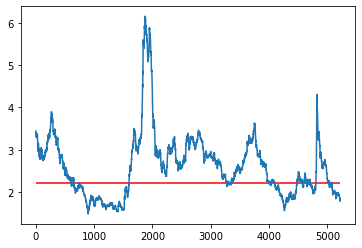

In [144]:
import matplotlib.pyplot as plt
plt.plot(df_spread.index, df_spread.iloc[:,c_baa])
plt.hlines(theta, xmin=min(df_spread.index), xmax=max(df_spread.index), colors='red')
plt.show()